## Stop and Search
### A120:   "Stop and Search is a power that allows the police to speak to someone if they think they have been involved in a crime, and to search them to see whether they are carrying anything that they should not be. To what extent do you agree that the Police should conduct Stop and Search?"

### A121: How confident are you that the Police in your area use their stop and search powers fairly? 
### ReXQ135: Gender Male/Female
### ReQ136: Age ranges/intervals
### ReNQ147: Ethnicity


In [4]:
import pandas as pd
import glob
path="/Temp/MOPAC/"

In [5]:
_df_pas = pd.read_csv(path+"/PAS_ward_level_FY_20_21.csv")

C:\Users\rhahi\AppData\Local\Temp\ipykernel_14388\3572586567.py:1: DtypeWarning: Columns (10,11,12,13,17,24,33,34,46,47,48,49,50,51,52,53,59,60,61,64,65,66,67,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,107,108,109,110,112,113,114,115,116,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  _df_pas = pd.read_csv(path+"/PAS_ward_level_FY_20_21.csv")


In [8]:
list_pas =['Week','interview_date','MONTH', 'Borough', 'Q1', 'Q13', 'Q15', 'Q60', 'Q61', 'Q62A','Q62B', 'Q62C', 'Q62F', 'Q62TG', 'A120', 'A121' ,'NQ135BD', 'NQ135BDB', 'NQ135BDD', 'NQ62B', 'NQ62C', 
          'BQ90A', 'BQ90DA', 'BQ90F', 'Q131', 'Q133', 'RQ80E', 'NQ133A', 'NQCV26', 'ReQ136', 'ReNQ147','ReQ150','ReQ139']

# The following parameters are avaialbe in survey dataset; not sure how to use or what they actually mean
list_not_sure = ['NPQ135A','NPQ135B', 'NPQ135C','NNQ135A','NNQ135B', 'NNQ135C', ]


list_stop_search = ['A120','A121', 'ReXQ135', 'ReQ136', 'ReNQ147', 'Week','interview_date','MONTH', 'Borough']

In [9]:
#Create dataframe using columns that confain info about stop-and-search

#df_pas_ss = _df_pas[ list_stop_search].copy()
df_pas_ss = _df_pas[list_pas].copy()
df_pas_ss['MONTH'].head()
df_pas_ss.head()

,Week,interview_date,MONTH,Borough,Q1,Q13,Q15,Q60,Q61,Q62A,...,BQ90F,Q131,Q133,RQ80E,NQ133A,NQCV26,ReQ136,ReNQ147,ReQ150,ReQ139
0,01/04/2020-05/04/2020,1.380534e+10,109 (Apr 2020),Barking & Dagenham,3 years but less than 5 years,Not very worried,Not very worried,Fair,Poor,Neither agree nor disagree,...,NaN,Not at all informed,Fairly well informed,Yes,No,No confidence at all,25 to 34,White British,Heterosexual,Full time (31+ hours per week)
1,01/04/2020-05/04/2020,1.380516e+10,109 (Apr 2020),Barnet,30 years or more,Not very worried,Not at all worried,Good,Fair,Strongly agree,...,NaN,Not at all informed,Not at all informed,Yes,No,A fair amount of confidence,55 to 64,Black,Heterosexual,Full time (31+ hours per week)
2,01/04/2020-05/04/2020,1.380508e+10,109 (Apr 2020),Barnet,30 years or more,Not very worried,Not very worried,Fair,Good,Neither agree nor disagree,...,NaN,Fairly well informed,Fairly well informed,Yes,No,A fair amount of confidence,65+,Other,"Non-Heterosexual (Gay, Lesbian, Bisexual, None...",Retired
3,01/04/2020-05/04/2020,1.380516e+10,109 (Apr 2020),Bexley,10 years but less than 20 years,Not very worried,Not very worried,Fair,Fair,Tend to agree,...,NaN,Fairly well informed,Fairly well informed,No,No,A fair amount of confidence,55 to 64,White Other,Heterosexual,Full time (31+ hours per week)
4,01/04/2020-05/04/2020,1.380525e+10,109 (Apr 2020),Brent,10 years but less than 20 years,Fairly worried,Fairly worried,Fair,Good,Tend to agree,...,NaN,Not at all informed,Not at all informed,No,No,A fair amount of confidence,16 to 24,Asian,Refused,Student/full time education


In [10]:
#Convert month variable into yyyy-mm format

# Define a function to extract and format the year and month
def extract_year_month(date_str):
    # Split the string to get the part with the month and year
    _, month_year = date_str.split('(')
    month_year = month_year.strip(')')  # Remove the closing parenthesis
    month_name, year = month_year.split()  # Split into month name and year
    
    # Convert month name to month number
    month_num = pd.to_datetime(month_name, format='%b').month
    
    # Return the formatted string
    return f'{year}-{month_num:02d}'

# Apply the function to the 'MONTH' column to create the 'ym' column
df_pas_ss['ym'] = df_pas_ss['MONTH'].apply(extract_year_month)

# Display the DataFrame
df_pas_ss.head(2)
df_pas_ss.to_csv(path+"sas_census_ss2.csv")

In [11]:
df_pas_ss['Borough'].unique()

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Richmond Upon Thames', 'Bromley', 'Camden', 'Croydon', 'Harrow',
       'Ealing', 'Enfield', 'Hackney', 'Hammersmith & Fulham', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Haringey',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Merton',
       'Lambeth', 'Greenwich', 'Newham', 'Redbridge', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Lewisham'], dtype=object)

In [12]:
def process_outcome_csv_file(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path, index_col=False)
    return df


b=True
for file_path in glob.glob(path+'*-city-of-london-outcomes.csv' ): 
    #files_to_process = f"\\Users\\Casey\\Dash\\JupyNote\\data\\Stats19\\collision_{point_year}.csv" 
        _df_outcomes = process_outcome_csv_file(file_path)
        if b == True:
            df_outcomes = _df_outcomes.copy()
            # follow by proc summary
            b = False
        else:
           df_outcomes = pd.concat([df_outcomes,_df_outcomes], ignore_index = True)
            # follow by proc summary
  
            
df_outcomes.to_csv(path+'sas_outcomes.csv')

In [13]:
def process_street_csv_file(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path, index_col=False)
    return df


b=True
for file_path in glob.glob(path+'*-city-of-london-street.csv' ): 
    #files_to_process = f"\\Users\\Casey\\Dash\\JupyNote\\data\\Stats19\\collision_{point_year}.csv" 
        _df_street = process_street_csv_file(file_path)
        if b == True:
            df_street = _df_street.copy()
            # follow by proc summary
            b = False
        else:
           df_street = pd.concat([df_street,_df_street], ignore_index = True)
            # follow by proc summary
  
            
df_street.to_csv(path+'sas_street.csv')

In [ ]:
#df_pas_ss.to_csv('/temp/DC2/df_pas_ss.csv')

In [15]:
def process_stop_search_csv_file(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path, index_col=False)
    return df


b=True
for file_path in glob.glob(path+'*-city-of-london-stop-and-search.csv' ): 
    #files_to_process = f"\\Users\\Casey\\Dash\\JupyNote\\data\\Stats19\\collision_{point_year}.csv" 
        _df_ss = process_stop_search_csv_file(file_path)
        if b == True:
            df_ss = _df_ss.copy()
            # follow by proc summary
            b = False
        else:
           df_ss = pd.concat([df_ss,_df_ss], ignore_index = True)
            # follow by proc summary
  
            
df_ss = df_ss.drop_duplicates()

df_ss['Date'] = pd.to_datetime(df_ss['Date'])

# Create a new column 'ym' with the format 'yyyy-mm'
df_ss['ym'] = df_ss['Date'].dt.strftime('%Y-%m')
df_ss.to_csv(path+'sas_ss.csv')

In [16]:
df_joined = pd.merge(df_ss, df_pas_ss, on='ym', how='inner')

### Overall view; adapt code to compare pair-wise of choses variable agains ethnicity or other chocies

In [17]:


import pandas as pd

path="/Temp/MOPAC/"

# Step 1: Read the data
df = pd.read_csv(path+'sas_census_ss2.csv')

# Step 2: Create table t1A
t1A = (df.groupby(['Borough', 'ReNQ147'])
       .size()
       .reset_index(name='count')
       .sort_values(by=['Borough', 'count'], ascending=[True, False]))

# Step 3: Create table t1B
t1B = (df.groupby(['Borough', 'ReNQ147', 'A120'])
       .size()
       .reset_index(name='count')
       .sort_values(by=['Borough', 'ReNQ147', 'count'], ascending=[True, True, False]))

# Step 4: Merge t1B with t1A to get totcount
t1 = pd.merge(t1B, t1A[['Borough', 'ReNQ147', 'count']], 
              on=['Borough', 'ReNQ147'], 
              suffixes=('', '_totcount'))

# Step 5: Calculate percentage
t1['pct'] = round(100 * t1['count'] / t1['count_totcount'])

# Step 6: Sort the final DataFrame
t2 = t1.sort_values(by=['Borough', 'A120', 'pct'], ascending=[True, True, False])

# Display the final DataFrame
t2.tail()


,Borough,ReNQ147,A120,count,count_totcount,pct
936,Westminster,Black,Tend to disagree,2,23,9.0
942,Westminster,Other,Tend to disagree,2,35,6.0
951,Westminster,White British,Tend to disagree,8,176,5.0
932,Westminster,Asian,Tend to disagree,2,55,4.0
948,Westminster,Refused,Tend to disagree,1,24,4.0


### Similar as above, but now on a monthly basis

In [18]:
import pandas as pd

# Assuming you have a CSV file named 'sas_census_ss2.csv' with the same data
# Replace 'sas_census_ss2.csv' with the actual path to your dataset

# Step 1: Read the data
df = pd.read_csv(path+'sas_census_ss2.csv')

# Step 2: Create table t1A
t1A = (df.groupby(['ym', 'Borough', 'ReNQ147'])
       .size()
       .reset_index(name='count')
       .sort_values(by=['ym', 'Borough', 'count'], ascending=[True, True, False]))

# Step 3: Create table t1B
t1B = (df.groupby(['ym', 'Borough', 'ReNQ147', 'A120'])
       .size()
       .reset_index(name='count')
       .sort_values(by=['ym', 'Borough', 'ReNQ147', 'count'], ascending=[True, True, True, False]))

# Step 4: Merge t1B with t1A to get totcount
t1 = pd.merge(t1B, t1A[['ym', 'Borough', 'ReNQ147', 'count']], 
              on=['ym', 'Borough', 'ReNQ147'], 
              suffixes=('', '_totcount'))

# Step 5: Calculate percentage
t1['pct'] = round(100 * t1['count'] / t1['count_totcount'])

# Step 6: Sort the final DataFrame
t2 = t1.sort_values(by=['ym', 'Borough', 'A120', 'pct'], ascending=[True, True, True, False])

# Display the final DataFrame
t2.head()


,ym,Borough,ReNQ147,A120,count,count_totcount,pct
5,2020-04,Barking & Dagenham,Mixed,Neither agree nor disagree,1,1,100.0
1,2020-04,Barking & Dagenham,Black,Neither agree nor disagree,2,6,33.0
9,2020-04,Barking & Dagenham,White British,Neither agree nor disagree,1,21,5.0
0,2020-04,Barking & Dagenham,Asian,Strongly agree,3,3,100.0
8,2020-04,Barking & Dagenham,White British,Strongly agree,18,21,86.0


In [21]:
import pandas as pd

# Assuming df is your DataFrame
# Group by 'ReNQ147' and 'A120', then calculate the mean of 'pct'
grouped_df = t2.groupby(['ReNQ147', 'A120'])['pct'].mean().reset_index()

# Rename columns for clarity
grouped_df.columns = ['Ethnicity', 'Ordinal Value', 'Average Percentage']

# Display the result
print(grouped_df)

        Ethnicity               Ordinal Value  Average Percentage
0           Asian  Neither agree nor disagree           25.221053
1           Asian              Strongly agree           57.797297
2           Asian           Strongly disagree           26.361111
3           Asian               Tend to agree           43.906077
4           Asian            Tend to disagree           27.333333
5           Black  Neither agree nor disagree           31.101562
6           Black              Strongly agree           40.027473
7           Black           Strongly disagree           26.411111
8           Black               Tend to agree           44.370000
9           Black            Tend to disagree           29.750000
10          Mixed  Neither agree nor disagree           57.261905
11          Mixed              Strongly agree           73.326733
12          Mixed           Strongly disagree           64.896552
13          Mixed               Tend to agree           68.784946
14        

In [35]:
#t2.loc[t2['Borough'] == 'Barking & Dagenham']
filtered_df = t2[(t2['Borough'] == 'Barking & Dagenham') & (t2['ReNQ147'] == 'Black')]
filtered_df

,ym,Borough,ReNQ147,A120,count,count_totcount,pct
1,2020-04,Barking & Dagenham,Black,Neither agree nor disagree,2,6,33.0
3,2020-04,Barking & Dagenham,Black,Strongly agree,1,6,17.0
2,2020-04,Barking & Dagenham,Black,Tend to agree,2,6,33.0
4,2020-04,Barking & Dagenham,Black,Tend to disagree,1,6,17.0
406,2020-05,Barking & Dagenham,Black,Neither agree nor disagree,1,7,14.0
405,2020-05,Barking & Dagenham,Black,Strongly agree,2,7,29.0
407,2020-05,Barking & Dagenham,Black,Strongly disagree,1,7,14.0
408,2020-05,Barking & Dagenham,Black,Tend to agree,1,7,14.0
409,2020-05,Barking & Dagenham,Black,Tend to disagree,1,7,14.0
805,2020-06,Barking & Dagenham,Black,Neither agree nor disagree,2,9,22.0


In [22]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load the dataset
# Assuming the dataset is already read into a DataFrame named df_import
# Replace 'path/to/import.csv' with the actual path to your CSV file


# Group by the specified columns and count occurrences
summary = df_joined.groupby(['ym', 'Gender', 'Age range', 'Officer-defined ethnicity',
                             'Object of search', 'Outcome', 
                             'Removal of more than just outer clothing', 'A120', 
                             'A121', 'ReXQ135', 'ReQ136', 'ReNQ147']).agg(
    count=('ym', 'size')
).reset_index()

# Rename the column for clarity
summary = summary.rename(columns={
    'Removal of more than just outer clothing': 'clothes_removal'
})


# Optionally, save the summary to a new CSV file
summary.to_csv("/temp/DC2/summary.csv", index=False)
summary.head()

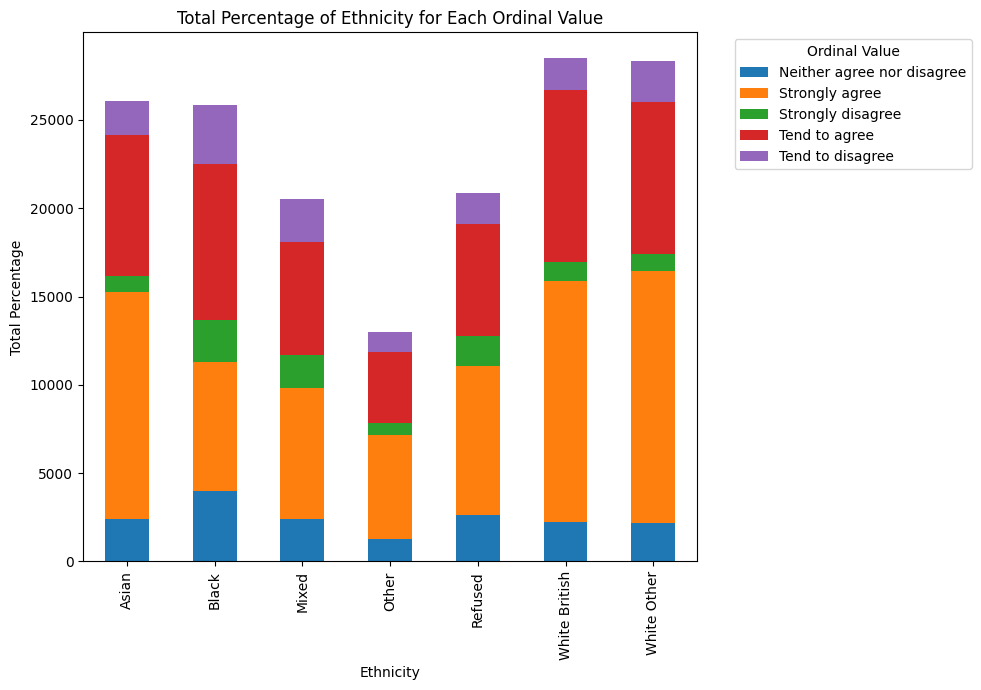

In [44]:
# Group by ReNQ147 and A120, and sum the pct column
grouped_df = t2.groupby(['ReNQ147', 'A120'])['pct'].sum().reset_index()

# Pivot the table to make it easier to plot
pivot_df = grouped_df.pivot(index='ReNQ147', columns='A120', values='pct')

# Plot the data
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Ethnicity')
plt.ylabel('Total Percentage')
plt.title('Total Percentage of Ethnicity for Each Ordinal Value')
plt.legend(title='Ordinal Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# for each ordinal value, how much on avg did each ethnicity vote for?

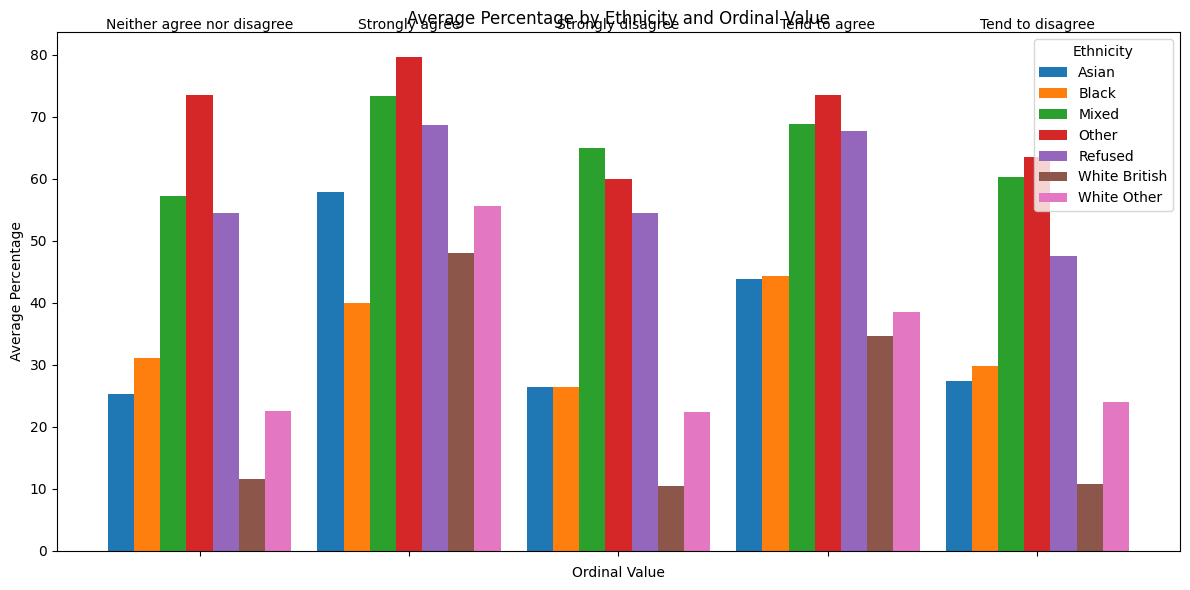

In [43]:
grouped_df = t2.groupby(['ReNQ147', 'A120'])['pct'].mean().reset_index()
grouped_df.columns = ['Ethnicity', 'Ordinal Value', 'Average Percentage']

# Get unique ordinal values and ethnicities
ordinal_values = grouped_df['Ordinal Value'].unique()
ethnicities = grouped_df['Ethnicity'].unique()

# Set up bar width and positions
bar_width = 0.2
x = np.arange(len(ordinal_values)) * (len(ethnicities) + 1) * bar_width

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each ethnicity
for i, ethnicity in enumerate(ethnicities):
    subset = grouped_df[grouped_df['Ethnicity'] == ethnicity]
    ax.bar(x + i * bar_width, subset['Average Percentage'], bar_width, label=ethnicity)

# Add labels and title
ax.set_xlabel('Ordinal Value')
ax.set_ylabel('Average Percentage')
ax.set_title('Average Percentage by Ethnicity and Ordinal Value')

# Set custom x-axis tick positions and labels
ax.set_xticks(x + bar_width * (len(ethnicities) - 1) / 2)
ax.set_xticklabels([])

# Annotate the ordinal value labels above the grouped bars
for i, value in enumerate(ordinal_values):
    ax.text(x[i] + bar_width * (len(ethnicities) - 1) / 2, ax.get_ylim()[1], value, ha='center', va='bottom')

ax.legend(title='Ethnicity')

# Show the plot
plt.tight_layout()
plt.show()

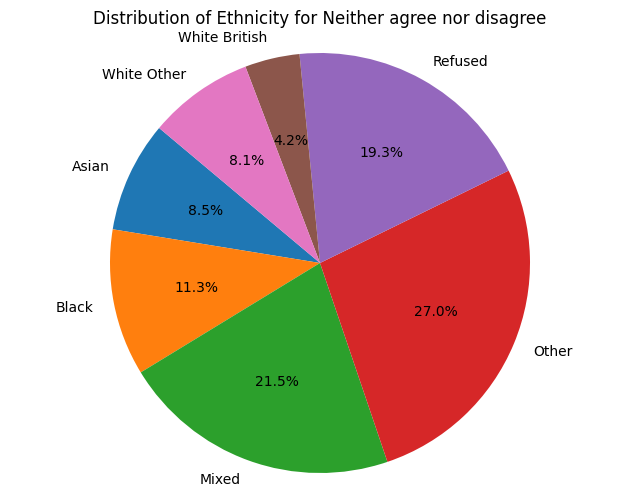

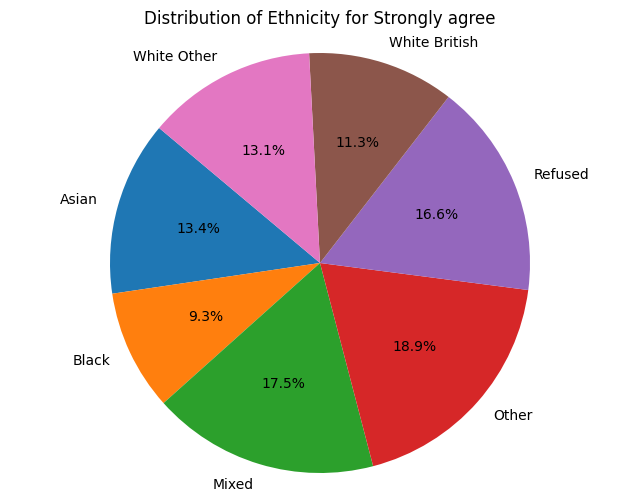

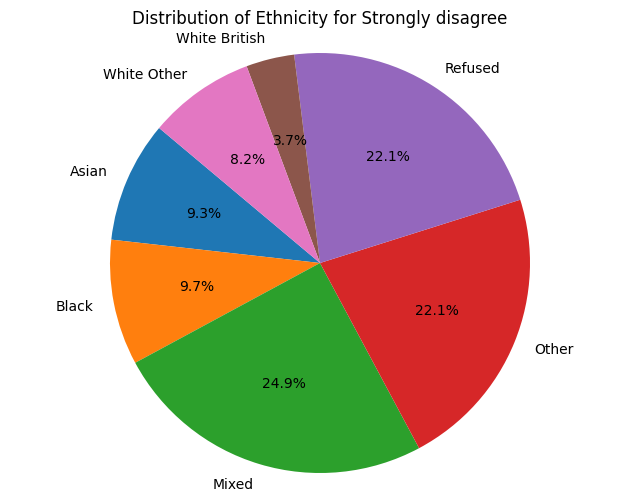

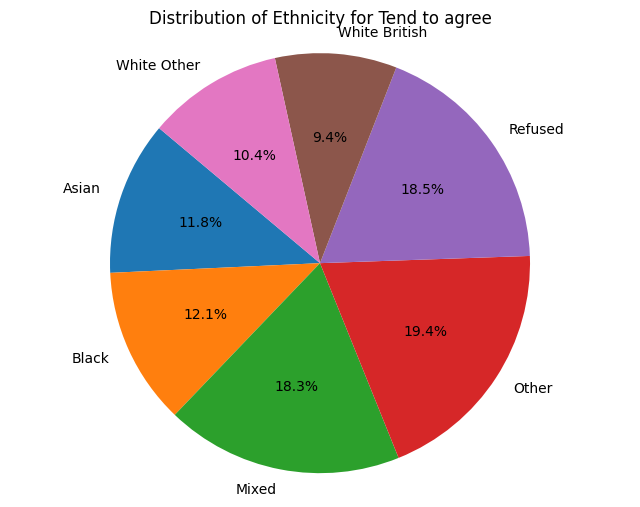

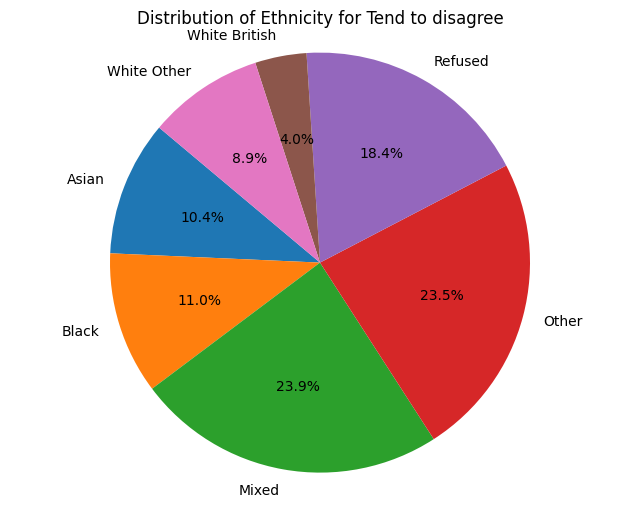

In [39]:
monthly_avg_df = t2.groupby(['ReNQ147', 'A120', 'ym'])['pct'].mean().reset_index()

# Now group by 'ReNQ147' and 'A120' and calculate the overall mean across all months
overall_avg_df = monthly_avg_df.groupby(['ReNQ147', 'A120'])['pct'].mean().reset_index()
overall_avg_df.columns = ['Ethnicity', 'Ordinal Value', 'Average Percentage']

# Get unique ordinal values
ordinal_values = overall_avg_df['Ordinal Value'].unique()

# Create a pie chart for each ordinal value
for ordinal_value in ordinal_values:
    subset = overall_avg_df[overall_avg_df['Ordinal Value'] == ordinal_value]
    plt.figure(figsize=(8, 6))
    plt.pie(subset['Average Percentage'], labels=subset['Ethnicity'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Ethnicity for {ordinal_value}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

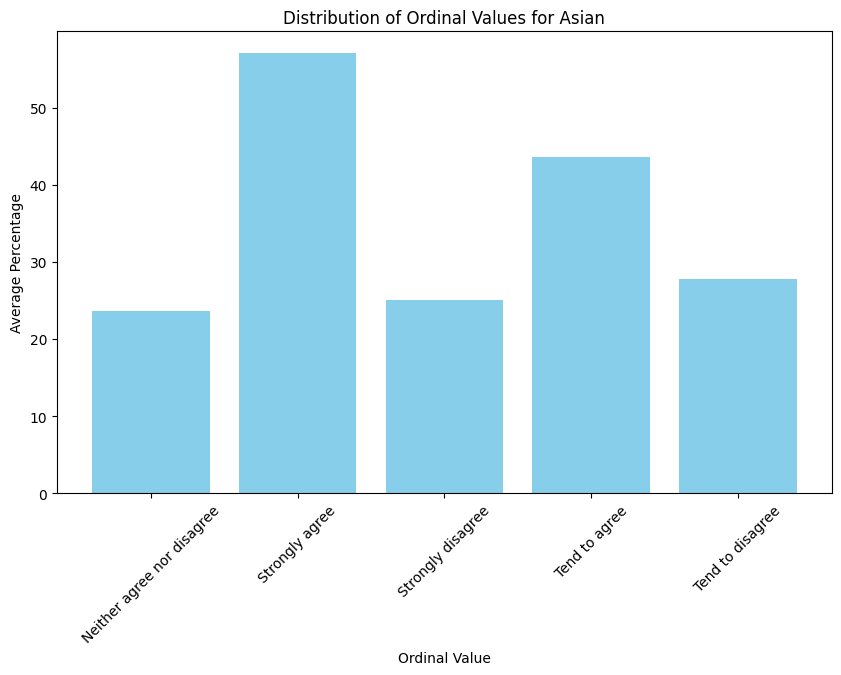

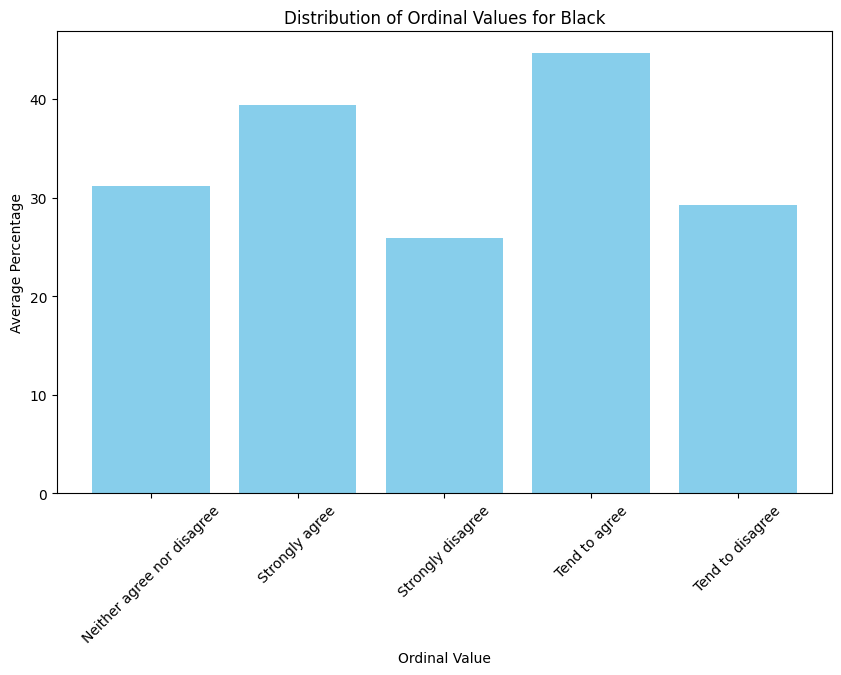

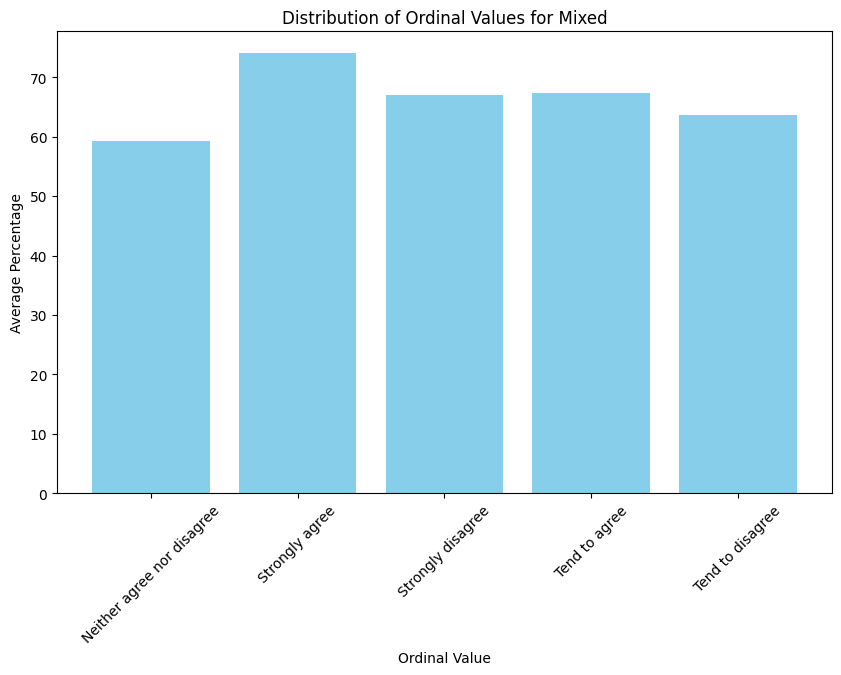

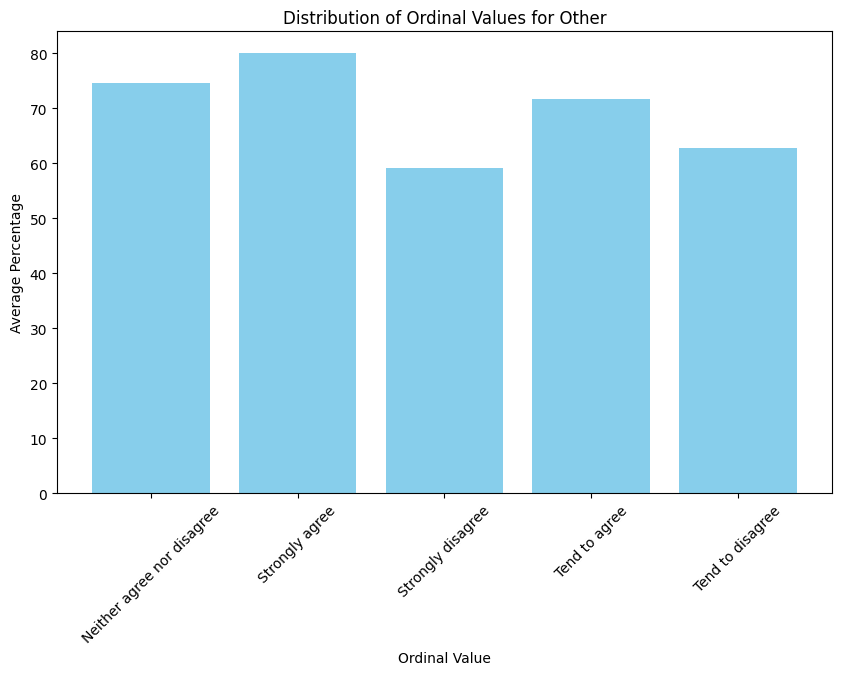

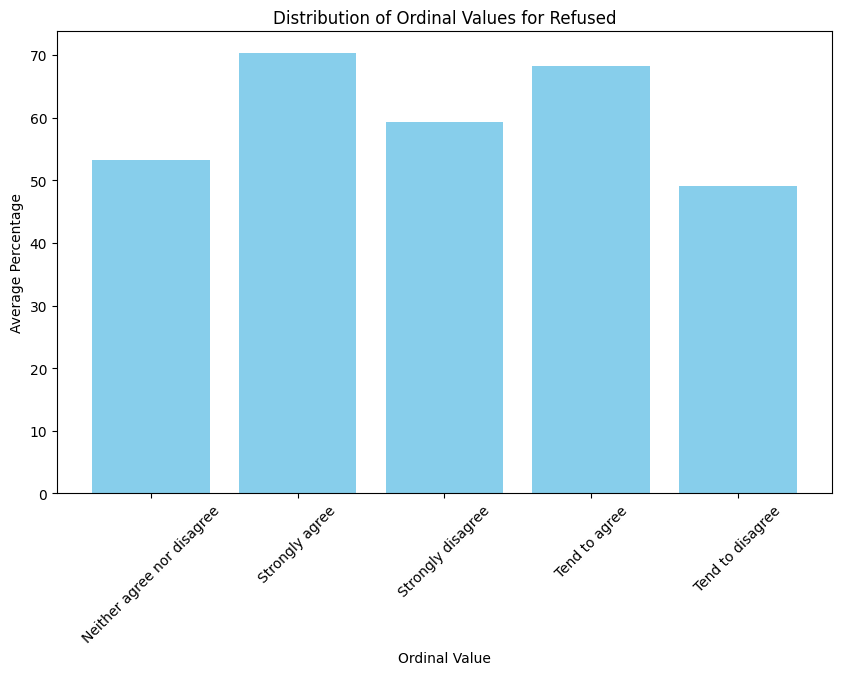

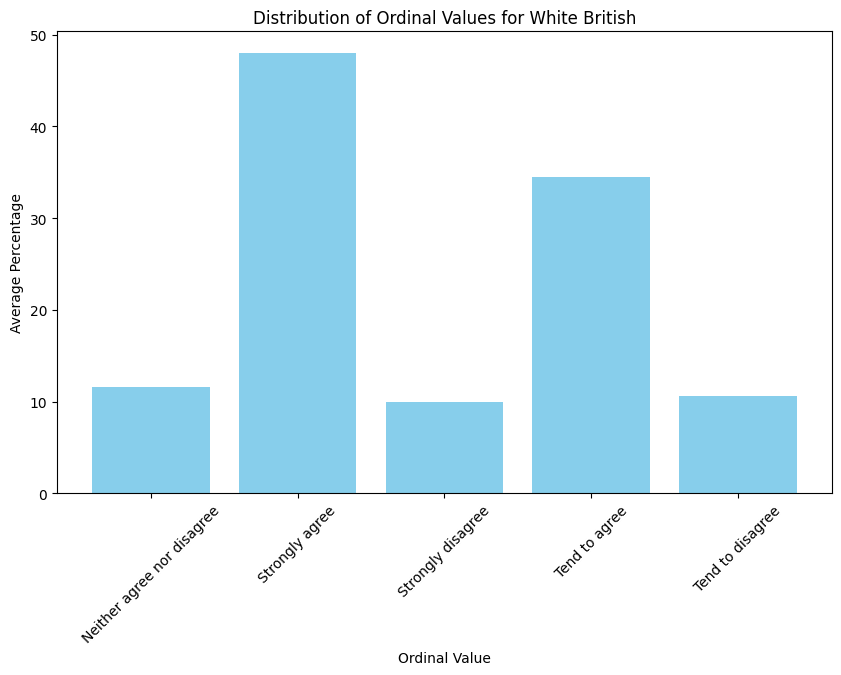

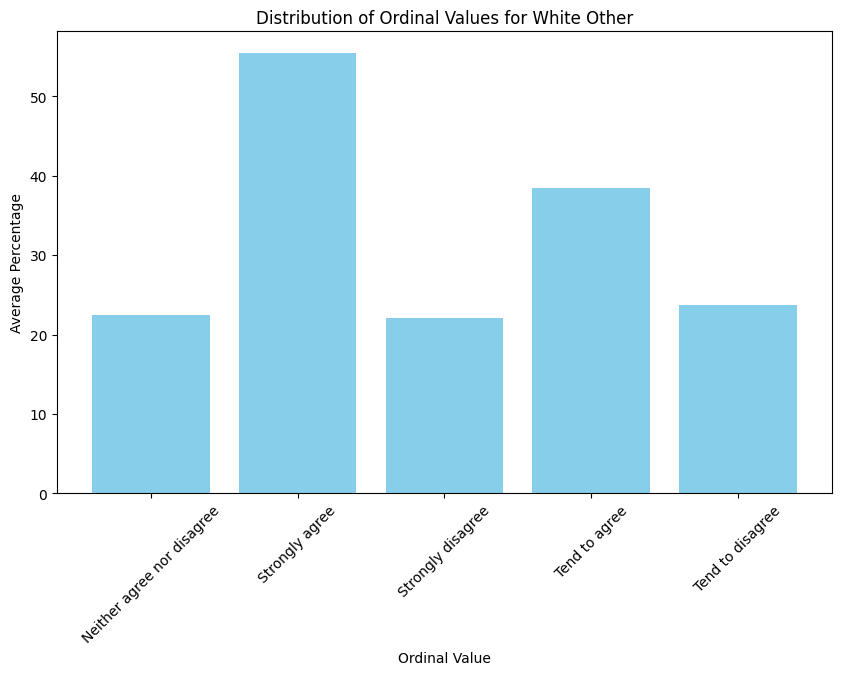

In [41]:


# Group by 'ReNQ147', 'A120', and 'ym', then calculate the mean of 'pct' for each month
monthly_avg_df = t2.groupby(['ReNQ147', 'A120', 'ym'])['pct'].mean().reset_index()

# Now group by 'ReNQ147' and 'A120' and calculate the overall mean across all months
overall_avg_df = monthly_avg_df.groupby(['ReNQ147', 'A120'])['pct'].mean().reset_index()
overall_avg_df.columns = ['Ethnicity', 'Ordinal Value', 'Average Percentage']

# Get unique ethnicities
ethnicities = overall_avg_df['Ethnicity'].unique()

# Create a bar chart for each ethnicity
for ethnicity in ethnicities:
    subset = overall_avg_df[overall_avg_df['Ethnicity'] == ethnicity]
    plt.figure(figsize=(10, 6))
    plt.bar(subset['Ordinal Value'], subset['Average Percentage'], color='skyblue')
    plt.xlabel('Ordinal Value')
    plt.ylabel('Average Percentage')
    plt.title(f'Distribution of Ordinal Values for {ethnicity}')
    plt.xticks(rotation=45)
    plt.show()